# Klasyfikacja obiektów kosmicznych - EDA


### Pakiety 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Cel biznesowy
Celem biznesowym zadania jest klasyfikacja typów obiektów kosmicznych (zbudowanie modelu, który będzie klasyfikował typy obiektów kosmicznych).



### 2. Dane
### 2.1. Podział danych na zbiór treningowy i testowy

In [3]:
# wczytanie danych
df = pd.read_csv('./data/development_data.csv')

# podział danych na zbiór treningowy i testowy
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# reset indeksów
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

### 2.2. Informacje o kolumnach 
źródło: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?resource=download

**obj_ID** = identyfikator obiektu, unikalna wartość identyfikująca obiekt w katalogu obrazów używanym przez CAS  
**alpha** = kąt prawego wzniesienia (w epoce J2000)  
**delta** = kąt deklinacji (w epoce J2000)  
**u** = Filtr ultrafioletowy w systemie fotometrycznym  
**g** = filtr zielony w systemie fotometrycznym  
**r** = filtr czerwony w systemie fotometrycznym  
**i** = Filtr bliskiej podczerwieni w systemie fotometrycznym  
**z** = Filtr podczerwieni w systemie fotometrycznym  
**run_ID** = numer przebiegu używany do identyfikacji konkretnego skanu  
**rereun_ID** = numer ponownego uruchomienia określający sposób przetworzenia obrazu  
**cam_col** = kolumna kamery do identyfikacji linii skanowania w przebiegu  
**field_ID** = numer pola do identyfikacji każdego pola  
**spec_obj_ID** = Unikalny identyfikator używany dla obiektów spektroskopii optycznej (oznacza to, że 2 różne obserwacje z tym samym identyfikatorem spec_obj_ID muszą dzielić klasę wyjściową)  
<span style="color:blue">**class** = klasa obiektu (galaktyka, gwiazda lub kwazar)</span>  
**redshift** = wartość przesunięcia ku czerwieni oparta na wzroście długości fali  
**plate** = identyfikator tablicy, identyfikuje każdą tablicę w SDSS  
**MJD** = zmodyfikowana data juliańska, używana do wskazania, kiedy dany fragment danych SDSS został pobrany  
**fiber_ID** = identyfikator włókna identyfikujący włókno, które skierowało światło na płaszczyznę ogniskową w każdej obserwacji



### 2.3. Podstawowe informacje o danych
Zauważamy, że nie ma brakujących danych. Wszystkie typy są liczbowe (int lub float), z wyjątkiem kolumny 'class'.

In [4]:
train_df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237651e+18,147.392648,0.145509,23.62785,21.78850,21.73961,21.88235,21.43752,1239,301,4,181,4.308885e+18,QSO,2.333820,3827,55565,240
1,1.237665e+18,157.156740,35.327317,18.60880,17.52187,17.12905,16.95103,16.89711,4518,301,6,192,2.204664e+18,GALAXY,0.043298,1958,53385,553
2,1.237667e+18,94.688025,63.535297,18.16716,16.51485,15.75641,15.35805,15.23041,5060,301,1,100,2.588464e+18,STAR,-0.000342,2299,53711,74
3,1.237655e+18,214.420238,-1.506597,19.83027,18.47293,17.82672,17.48600,17.26200,2334,301,5,124,1.032563e+18,GALAXY,0.081886,917,52400,411
4,1.237668e+18,204.749167,17.703206,19.33024,18.16558,17.74244,17.48129,17.32534,5314,301,1,181,2.935343e+18,GALAXY,0.061780,2607,54184,443
5,1.237680e+18,9.472956,27.896687,21.84835,21.25768,21.25116,20.99355,20.66064,8103,301,5,152,7.073156e+18,QSO,0.825294,6282,56572,920
6,1.237679e+18,6.514320,3.725924,22.89606,23.08747,21.51780,20.37108,19.72461,7712,301,6,373,9.848332e+18,GALAXY,0.552285,8747,57401,311
7,1.237663e+18,322.397605,0.185066,18.85759,17.69771,17.27650,17.04447,16.80128,4187,301,4,98,1.112519e+18,GALAXY,0.030239,988,52520,473
8,1.237661e+18,127.444409,28.226463,22.28067,22.19123,21.79689,21.05735,20.96889,3560,301,4,132,1.082237e+19,GALAXY,0.971070,9612,57801,798
9,1.237664e+18,15.845389,-0.696173,18.09889,16.67957,16.11639,15.88822,15.82032,4263,301,2,221,2.604293e+18,STAR,0.000112,2313,53726,315


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49000 entries, 0 to 48999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       49000 non-null  float64
 1   alpha        49000 non-null  float64
 2   delta        49000 non-null  float64
 3   u            49000 non-null  float64
 4   g            49000 non-null  float64
 5   r            49000 non-null  float64
 6   i            49000 non-null  float64
 7   z            49000 non-null  float64
 8   run_ID       49000 non-null  int64  
 9   rerun_ID     49000 non-null  int64  
 10  cam_col      49000 non-null  int64  
 11  field_ID     49000 non-null  int64  
 12  spec_obj_ID  49000 non-null  float64
 13  class        49000 non-null  object 
 14  redshift     49000 non-null  float64
 15  plate        49000 non-null  int64  
 16  MJD          49000 non-null  int64  
 17  fiber_ID     49000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usa

In [6]:
train_df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,4.900000e+04,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.0,49000.000000,49000.000000,4.900000e+04,49000.000000,49000.000000,49000.000000,49000.000000
mean,1.237665e+18,177.604538,24.130549,22.098590,20.640322,19.654032,19.091864,18.774755,4479.874204,301.0,3.510041,185.663082,5.795201e+18,0.576246,5147.062449,55594.878388,448.903694
std,8.424456e+12,96.435544,19.641175,2.253116,2.033170,1.852267,1.755689,1.762076,1961.481078,0.0,1.587281,149.048257,3.326069e+18,0.729714,2954.126386,1807.437362,272.525616
min,1.237646e+18,0.005528,-18.785328,12.101680,10.498200,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995801e+17,-0.007352,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.684086,5.256838,20.366730,18.980867,18.158278,17.754460,17.475920,3187.000000,301.0,2.000000,81.000000,2.849788e+18,0.054130,2531.000000,54242.000000,220.000000
50%,1.237663e+18,180.714503,23.667032,22.196395,21.103490,20.134315,19.410960,19.007725,4188.000000,301.0,4.000000,146.000000,5.616045e+18,0.424114,4988.000000,55881.000000,431.000000
75%,1.237668e+18,233.825251,39.834615,23.713487,22.127880,21.041418,20.405950,19.925895,5326.000000,301.0,5.000000,240.000000,8.337758e+18,0.704122,7405.250000,56780.000000,644.000000
max,1.237681e+18,359.999031,82.816030,30.660390,30.607000,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412684e+19,7.011245,12547.000000,58932.000000,1000.000000


In [7]:
train_df.nunique()

obj_ID         42453
alpha          49000
delta          49000
u              47471
g              47137
r              47061
i              47033
z              46972
run_ID           415
rerun_ID           1
cam_col            6
field_ID         839
spec_obj_ID    49000
class              3
redshift       48737
plate           6037
MJD             2157
fiber_ID        1000
dtype: int64

In [37]:
# sprawdzenie, czy nie mamy brakujących wartości w postaci zer
train_df_num = train_df.drop('class',axis=1)
zero_columns = train_df_num.columns[(train_df_num.abs() < 1e-10).mean() > 0.5]

# Print or use the identified columns
print("Columns with majority of values close to 0:")
print(len(zero_columns))

Columns with majority of values close to 0:
0


Brak kolumn z brakiem danych w formie zer.

Wnioski:  
- Dane w kolumnach 'cam_col' i 'rerun_ID' możemy traktować jako zmienne typu dyskretnego, natomiast pozostałe - jako ciągłego.  
- Zmienna 'rerun_ID' **nie ma żadnego znaczenia** w projekcie. Podobnie 'cam_col' nie mówi nam nic o danych.
- Dane o nazwach [coś]_ID nie mają znaczenia dla identyfikacji gwiazd. Wyjątkiem będzie spec_obj_ID.

### 2.4. Target
Badamy liczbę występowań różnych wartości w kolumnie 'class', w której mamy 3 możliwe wartości: GALAXY, STAR i QSO.

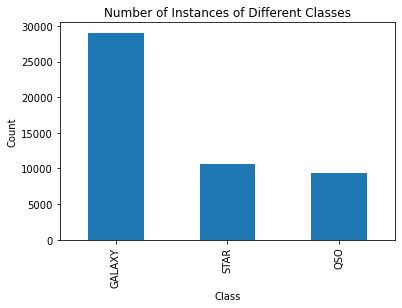

In [9]:
train_df['class'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Instances of Different Classes')
plt.show()

In [10]:
s = train_df.shape[0]

print("Procent wystąpień klasy GALAXY: " + str(train_df['class'].value_counts()[0]/s*100))
print("Procent wystąpień klasy QSO: " + str(train_df['class'].value_counts()[1]/s*100))
print("Procent wystąpień klasy STAR: " + str(train_df['class'].value_counts()[2]/s*100))

Procent wystąpień klasy GALAXY: 59.310204081632655
Procent wystąpień klasy QSO: 21.73469387755102
Procent wystąpień klasy STAR: 18.955102040816328


Najpopularniejszą wartością jest więc GALAXY (59%), następnie QSO (22%) i STAR (19%). Dane nie są więc zbalansowane - w większości obserwacji klasą gwiazdy jest GALAXY.

### 3. Eksploracja

### 3.1. Rozkłady poszczególnych zmiennych
Pomimo, że wszystkie zmienne są typu *float*, to nadal możemy mieć zmienne dyskretne/kategoryczne. Tak jest w przypadku rereun_ID (numer ponownego uruchomienia określający sposób przetworzenia obrazu) i cam_col (kolumna kamery do identyfikacji linii skanowania w przebiegu).

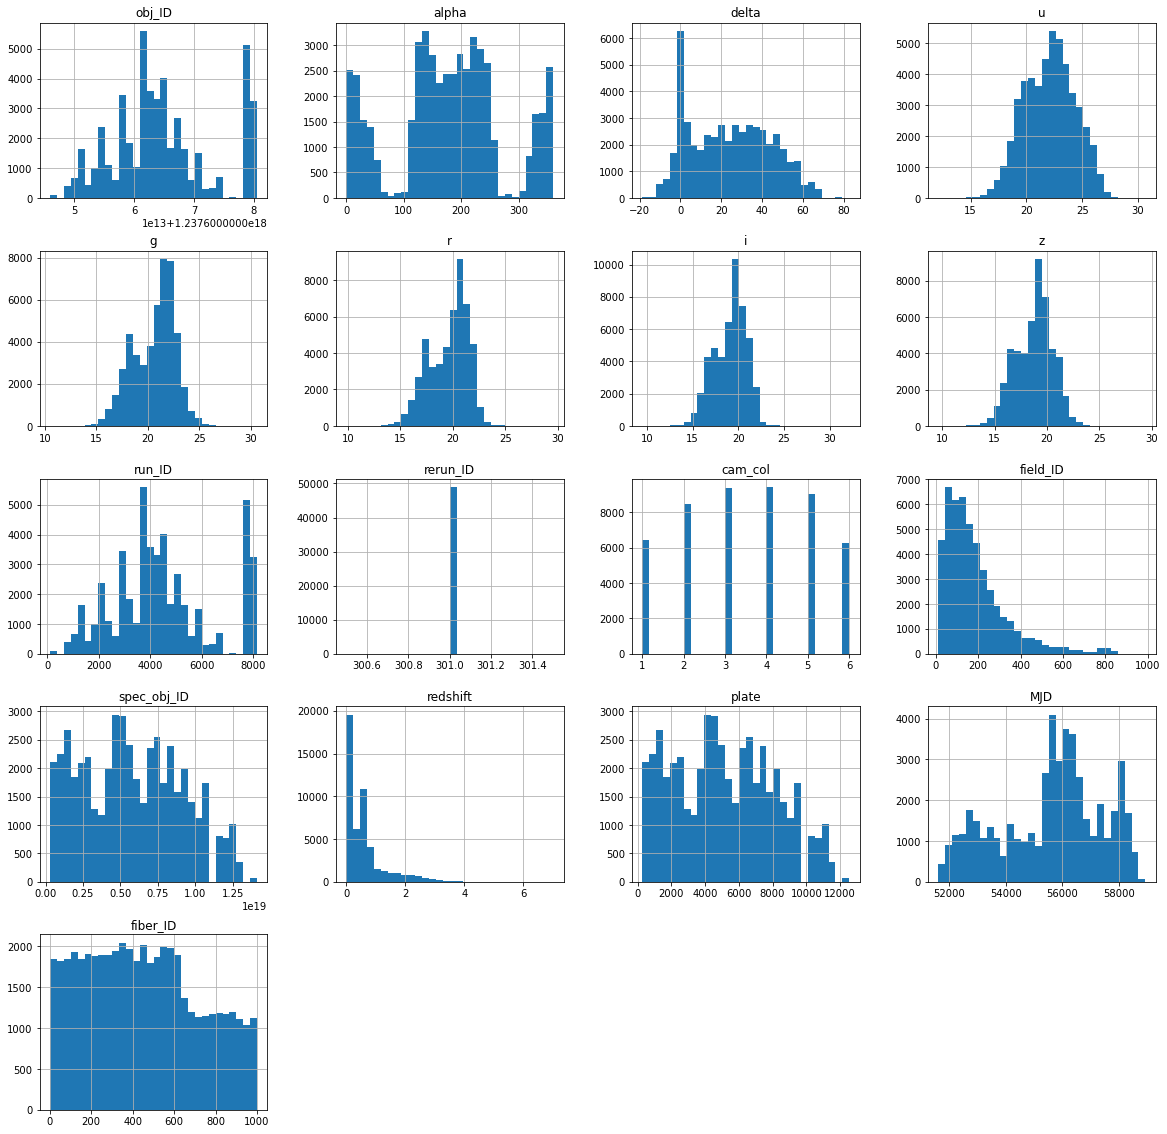

In [11]:
train_df.hist(bins=30, figsize=(20,20))
plt.show()

Obserwacje:
* zmienna u (= Filtr ultrafioletowy w systemie fotometrycznym) ma rozkład podobny do normalnego,
* zmienna field_ID (= numer pola do identyfikacji każdego pola) ma rozkład podobny do wykładniczego,
* dla zmiennej fiber_ID (= identyfikator włókna identyfikujący włókno, które skierowało światło na płaszczyznę ogniskową w każdej obserwacji) wartości są rónomiernie rozrzucone.

## Przegląd wizualizacji

### 3.2. Zależności między wybranymi dwiema zmiennymi numerycznymi

#### 3.2.1. Korelacja Pearsona

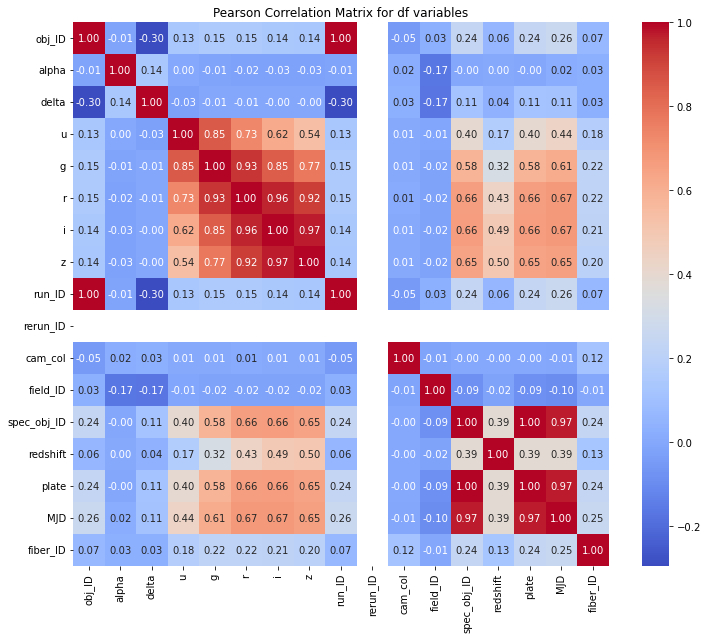

In [12]:
# heatmapa korelacji Pearsona między zmiennymi
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix for df variables")
plt.show()


#### 3.2.2. Korelacja Spearmana

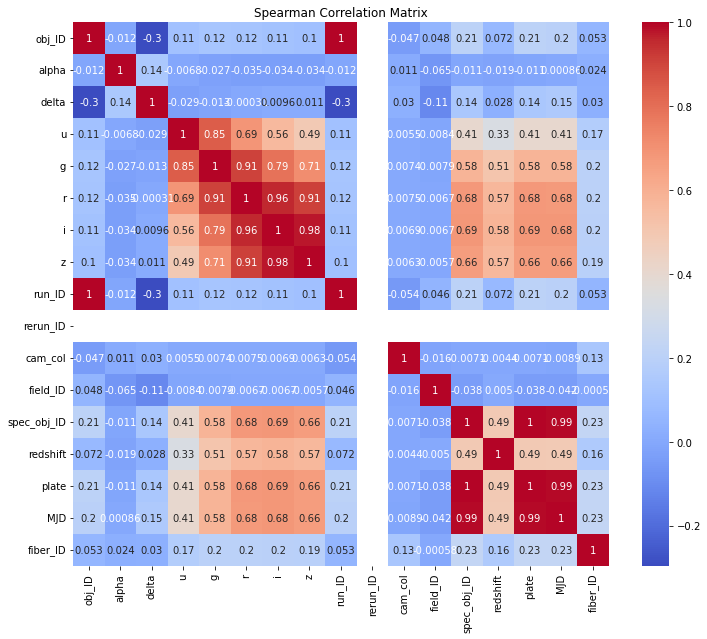

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(train_df.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title("Spearman Correlation Matrix")
plt.show()

Wnioski dot. korelacji znajdują się w dalszej części (zmienne numeryczne).

#### 3.2.3. Rozkład obiektów na sferze niebieskiej

Scatter plot dla "alpha" (kąt prawego wzniesienia (w epoce J2000)) vs "delta" (delta = kąt deklinacji (w epoce J2000)), aby zobaczyć rozkład obiektów na sferze niebieskiej.

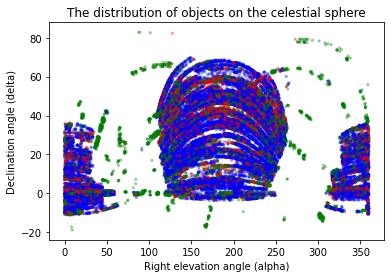

In [14]:
class_colors = {"QSO": "red", "GALAXY": "blue", "STAR": "green"}

plt.scatter(x = train_df["alpha"], y = train_df["delta"], s = 5, alpha = 0.3, c = train_df["class"].map(class_colors))

plt.title("The distribution of objects on the celestial sphere")
plt.xlabel("Right elevation angle (alpha)")
plt.ylabel("Declination angle (delta)")
plt.show()

# czemu to wyglada inaczej
# class_colors = {'QSO': 'red', 'GALAXY': 'blue', 'STAR': 'green'}

# # Create an empty plot
# fig, ax = plt.subplots()

# # Plot each class separately with its respective color
# for class_label, color in class_colors.items():
#     class_data = train_df[train_df["class"] == class_label]
#     ax.scatter(x =c lass_data["alpha"], y =class_data["delta"], s = 5, alpha = 0.3, color = color, label =c lass_label)

# plt.title("The distribution of objects on the celestial sphere")
# plt.xlabel("Right elevation angle (alpha)")
# plt.ylabel("Declination angle (delta)")
# plt.legend(title="Class")
# plt.show()

#### 3.2.4. Zależność przesunięcia lu czerwieni od czasu

Scatter plot dla kolumny "redshift" (wartość przesunięcia ku czerwieni oparta na wzroście długości fali) i kolumny "MJD" (zmodyfikowana data juliańska, używana do wskazania, kiedy dany fragment danych SDSS został pobrany). Zalezność kolumny "redshift" od kolumny "MJD", zeby zobaczyć jak wartość przesunięcia ku czerwieni zalezy od czasu.

Text(0, 0.5, 'Redshift value')

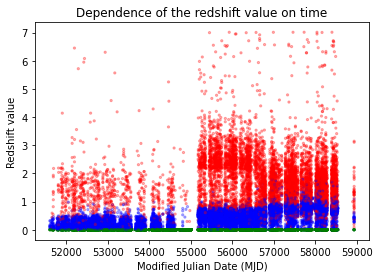

In [15]:
# train_df.plot.scatter(x = "MJD", y = "redshift", s = 5, alpha = 0.3)
class_colors = {"QSO": "red", "GALAXY": "blue", "STAR": "green"}
plt.scatter(x = train_df["MJD"], y = train_df["redshift"], s = 5, alpha = 0.3, c = train_df["class"].map(class_colors))
plt.title("Dependence of the redshift value on time")
plt.xlabel("Modified Julian Date (MJD)")
plt.ylabel("Redshift value")

#### 3.2.5. Zależność przesunięcia ku czerwieni od tablicy

Scatter plot dla kolumny "redshift" (wartość przesunięcia ku czerwieni oparta na wzroście długości fali) i kolumny "plate" (identyfikator tablicy, identyfikuje każdą tablicę w SDSS). Zalezność kolumny "redshift" od kolumny "plate", zeby zobaczyć jak wartość przesunięcia ku czerwieni zalezy od tablicy.

Text(0, 0.5, 'Redshift value')

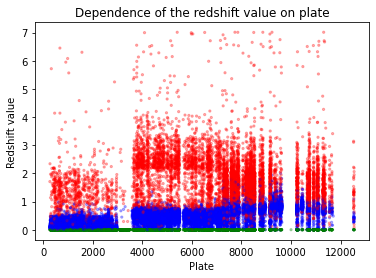

In [16]:
# train_df.plot.scatter(x = "plate", y = "redshift", s = 5, alpha = 0.3)
class_colors = {"QSO": "red", "GALAXY": "blue", "STAR": "green"}
plt.scatter(x = train_df["plate"], y = train_df["redshift"], s = 5, alpha = 0.3, c = train_df["class"].map(class_colors))
plt.title("Dependence of the redshift value on plate")
plt.xlabel("Plate")
plt.ylabel("Redshift value")


### 3.3. Zależność między zmiennymi dyskretnymi

#### 3.3.1. Rozkład klasy obiektu w zależności od cam_col
Rozkład klasy obiektu w zależności od zmiennej kategorialnej (dyskretnej) cam_col (kolumna kamery do identyfikacji linii skanowania w przebiegu) w postaci wykresu słupkowego.

<Figure size 720x432 with 0 Axes>

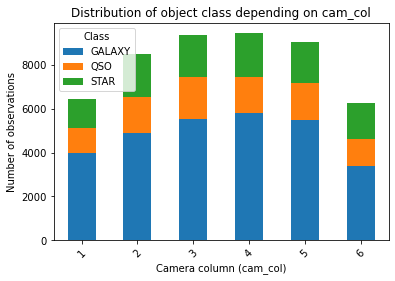

In [17]:
plt.figure(figsize = (10, 6))
train_df.groupby(["cam_col", "class"]).size().unstack().plot(kind = "bar", stacked = True)
plt.title("Distribution of object class depending on cam_col")
plt.xlabel("Camera column (cam_col)")
plt.ylabel("Number of observations")
plt.legend(title = "Class")
plt.xticks(rotation = 45)
plt.show()


#### 3.3.2. Rozkład klasy 'class' od 'plate'

Rozkład klasy obiektu w zależności od zmiennej kategorialnej (dyskretnej) "plate" (identyfikator tablicy, identyfikuje każdą tablicę w SDSS) w postaci wykresu słupkowego. (to samo co wyzej jak cos)

In [18]:
# plt.figure(figsize = (10, 6))
# train_df.groupby(["plate", "class"]).size().unstack().plot(kind = "bar", stacked = True)
# plt.title("Distribution of object class depending on plate")
# plt.xlabel("Plate ID")
# plt.ylabel("Number of observations")
# plt.legend(title = "Class")
# plt.xticks(45)
# plt.show() 

<span style="color:red;">Ten wykres sie strasznie dlugo ładuje, a jeśli juz sie załaduje, to jest nieczytelny.</span>

#### 3.3.3. Rozkład klas

Rozkład klas w danych. Ta heatmapa pokazuje rozkład klas w danych w zalezności od innych zmiennych kategorycznych: plate (identyfikator tablicy, identyfikuje każdą tablicę w SDSS), cam_col (kolumna kamery do identyfikacji linii skanowania w przebiegu), field_ID (numer pola do identyfikacji każdego pola). To pomoze zidentyfikować, czy klasy gwiazd są równomiernie rozłozone w róznych podgrupach danych.

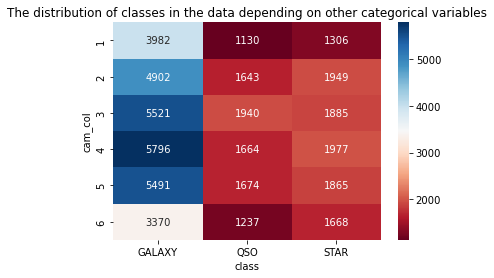

In [19]:
#class_distribution = train_df.groupby(["plate", "cam_col", "field_ID"])["class"].value_counts().unstack()
class_distribution = train_df.groupby(["cam_col"])["class"].value_counts().unstack()

# wypełnienie wartości NaN i inf zerami
class_distribution.replace([np.inf, -np.inf], np.nan, inplace=True)
class_distribution.fillna(0, inplace=True)

class_distribution = class_distribution.round().astype(int)
sns.heatmap(class_distribution, annot = True, cmap = "RdBu", fmt = "d")
plt.title("The distribution of classes in the data depending on other categorical variables")
plt.show()

### 3.4. Korelacje między zmiennymi numerycznymi

Korelacja między zmiennymi numerycznymi:
- alpha (kąt prawego wzniesienia (w epoce J2000))
- delta (kąt deklinacji (w epoce J2000))
- u (Filtr ultrafioletowy w systemie fotometrycznym)
- g (filtr zielony w systemie fotometrycznym)
- r (filtr czerwony w systemie fotometrycznym)
- i (Filtr bliskiej podczerwieni w systemie fotometrycznym)
- z (Filtr podczerwieni w systemie fotometrycznym)
- redshift (wartość przesunięcia ku czerwieni oparta na wzroście długości fali).
Heatmapa korelacji między zmiennymi numerycznymi. To pomoze zidentyfikować, które zmienne mają silne korelacje ze sobą.


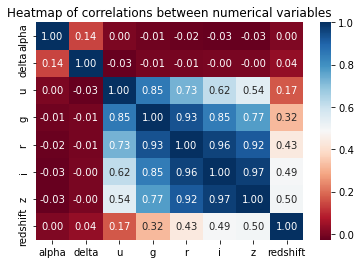

In [20]:
numerical_columns = ["alpha", "delta", "u", "g", "r", "i", "z", "redshift"]
corr = train_df[numerical_columns].corr()   # korelacje między zmiennymi
sns.heatmap(corr, annot = True, cmap = "RdBu", fmt = ".2f")
plt.title("Heatmap of correlations between numerical variables")
plt.show()

Powyżej, na początku tej sekcji, analizowaliśmy korelację Pearsona i Spearmana między zmiennymi. Wnioski były podobne w przypadku obu rodzajów korelacji.

Obserwacje:
duża korelacja między zmiennymi:
- u = Filtr ultrafioletowy w systemie fotometrycznym,
- g = filtr zielony w systemie fotometrycznym,
- r = filtr czerwony w systemie fotometrycznym,
- i = Filtr bliskiej podczerwieni w systemie fotometrycznym oraz
- z = Filtr podczerwieni w systemie fotometrycznym.


### 3.5. Średnie wartości zmiennych numerycznych

Średnia wartość zmiennych numerycznych w róznych klasach. Heatmapa średnich wartości numerycznych ("alpha", "delta", "u", "g", "r", "i", "z", "redshift") w róznych klasach. To pomoze zidentyfikować, czy istnieją istotne róznice między tymi zmiennymi między klasami.

Text(0.5, 1.0, 'Average value of numerical variables in different classes')

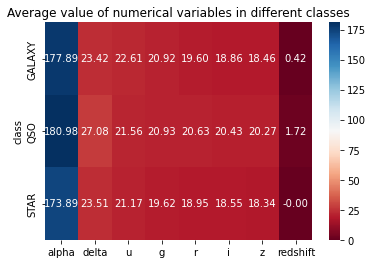

In [21]:
numeric_mean_by_class = train_df.groupby("class")[numerical_columns].mean()
sns.heatmap(numeric_mean_by_class, annot = True, cmap = "RdBu", fmt = ".2f")
plt.title("Average value of numerical variables in different classes")

### 3.6. Rozkład zmiennych numerycznych w zalezności od klasy

Violin plot, aby zobaczyć jak rozkładają się wartości kolumn w zalezności od klasy obiektu.

#### 3.6.1. rozkład redshift
Box plot - rozkład redshift (wartość przesunięcia ku czerwieni oparta na wzroście długości fali) w zalezności od klasy obiektu.

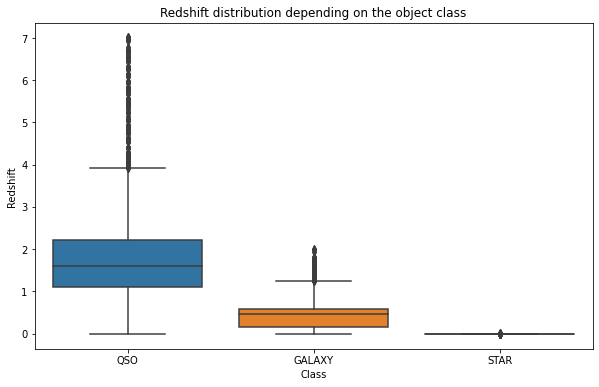

In [22]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = "class", y = "redshift", data = train_df)
plt.title("Redshift distribution depending on the object class")
plt.xlabel("Class")
plt.ylabel("Redshift")
plt.show()


Wniosek: **bardzo istotne** przy określaniu klasy.

#### 3.6.2. rozkład plate
plate (identyfikator tablicy, identyfikuje każdą tablicę w SDSS) w zalezności od klasy obiektu.

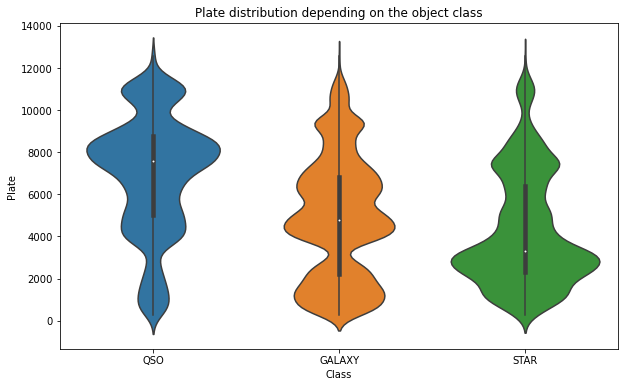

In [23]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = "class", y = "plate", data = train_df)
plt.title("Plate distribution depending on the object class")
plt.xlabel("Class")
plt.ylabel("Plate")
plt.show()

#### 3.6.3. rozkład MJD 
MJD (zmodyfikowana data juliańska, używana do wskazania, kiedy dany fragment danych SDSS został pobrany) w zalezności od klasy obiektu.

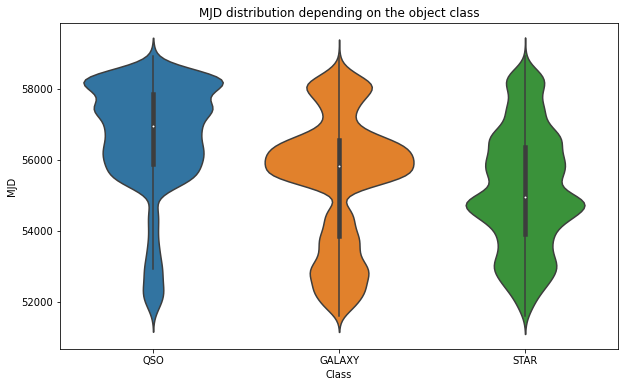

In [24]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = "class", y = "MJD", data = train_df)
plt.title("MJD distribution depending on the object class")
plt.xlabel("Class")
plt.ylabel("MJD")
plt.show()

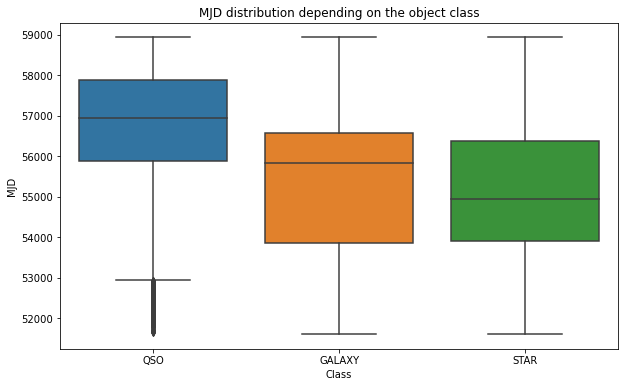

In [25]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = "class", y = "MJD", data = train_df)
plt.title("MJD distribution depending on the object class")
plt.xlabel("Class")
plt.ylabel("MJD")
plt.show()

#### 3.6.3. rozkład alpha
alpha = kąt prawego wzniesienia (w epoce J2000)


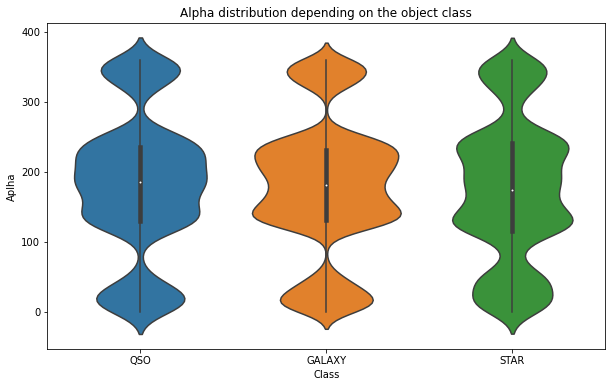

In [26]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = "class", y = "alpha", data = train_df)
plt.title("Alpha distribution depending on the object class")
plt.xlabel("Class")
plt.ylabel("Aplha")
plt.show()

#### 3.6.4. rozkład delta
delta = kąt deklinacji (w epoce J2000)


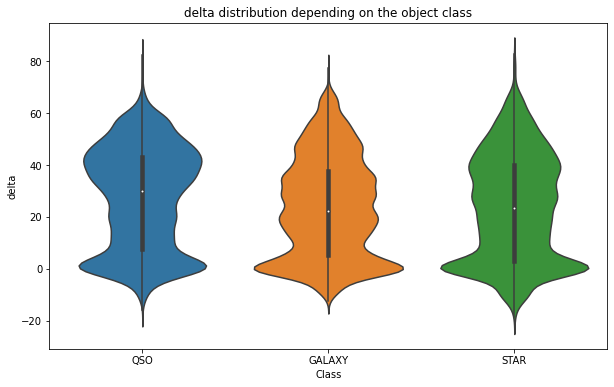

In [27]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = "class", y = "delta", data = train_df)
plt.title("delta distribution depending on the object class")
plt.xlabel("Class")
plt.ylabel("delta")
plt.show()

#### 3.6.5 rozkład u
u = Filtr ultrafioletowy w systemie fotometrycznym

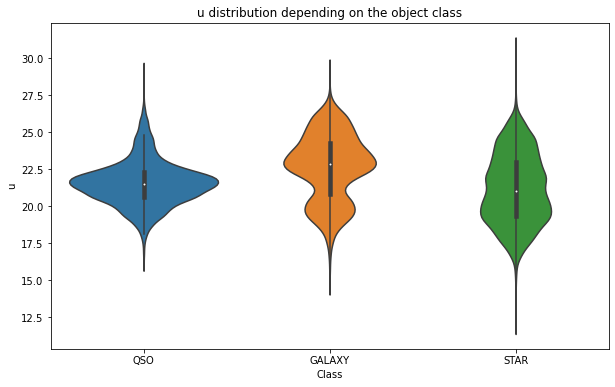

In [28]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = "class", y = "u", data = train_df)
plt.title("u distribution depending on the object class")
plt.xlabel("Class")
plt.ylabel("u")
plt.show()

Wniosek: QSO ma dużo wartości u~=21, podczas gdy GALAXY ma ich bardzo mało.

#### 3.6.6. rozkład g
g = filtr zielony w systemie fotometrycznym


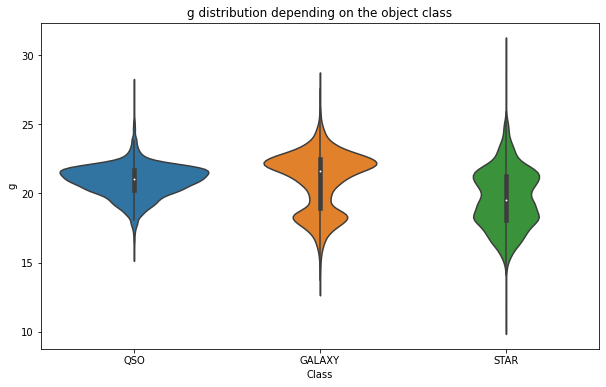

In [29]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = "class", y = "g", data = train_df)
plt.title("g distribution depending on the object class")
plt.xlabel("Class")
plt.ylabel("g")
plt.show()

#### 3.6.7. rozkład r
r = filtr czerwony w systemie fotometrycznym


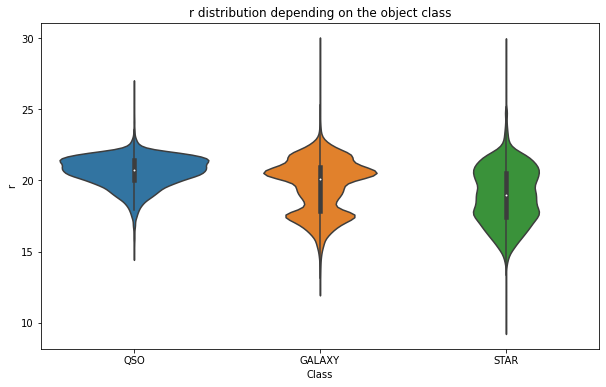

In [30]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = "class", y = "r", data = train_df)
plt.title("r distribution depending on the object class")
plt.xlabel("Class")
plt.ylabel("r")
plt.show()

#### 3.6.8. rozkład i
i = Filtr bliskiej podczerwieni w systemie fotometrycznym


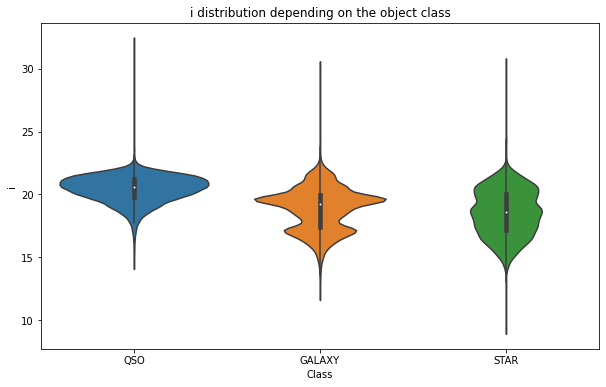

In [31]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = "class", y = "i", data = train_df)
plt.title("i distribution depending on the object class")
plt.xlabel("Class")
plt.ylabel("i")
plt.show()

#### 3.6.9. rozkład z
z = Filtr podczerwieni w systemie fotometrycznym


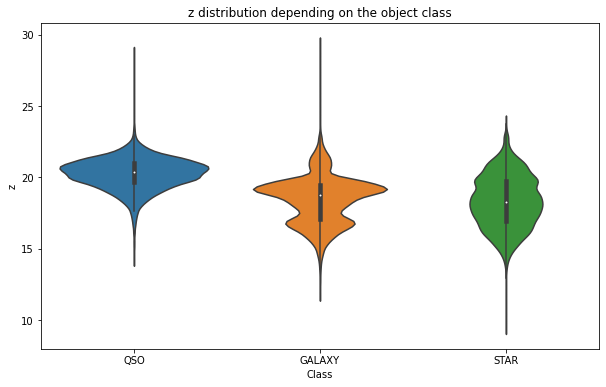

In [32]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = "class", y = "z", data = train_df)
plt.title("z distribution depending on the object class")
plt.xlabel("Class")
plt.ylabel("z")
plt.show()

#### 3.6.10. Wnioski: 
* zmienne skorelowane (u, g, r, i, z) mają podobne rozkłady (jakoś bardzo nas to nie dziwi),
* wartość redshift może mieć *duże* znaczenie przy określaniu typu gwiazdozbioru,
* QSO ma dużo wartości u~=21, podczas gdy GALAXY ma ich bardzo mało.

### 3.7. zależność dwóch zmiennych numerycznych i klasy
#### 3.7.1. wszystkie zmienne

In [33]:
#sns.pairplot(train_df, hue='class')

#### 3.7.2. zależność spec_obj_ID od u i klasy
spec_obj_ID = Unikalny identyfikator używany dla obiektów spektroskopii optycznej (oznacza to, że 2 różne obserwacje z tym samym identyfikatorem spec_obj_ID muszą dzielić klasę wyjściową)  
u = Filtr ultrafioletowy w systemie fotometrycznym


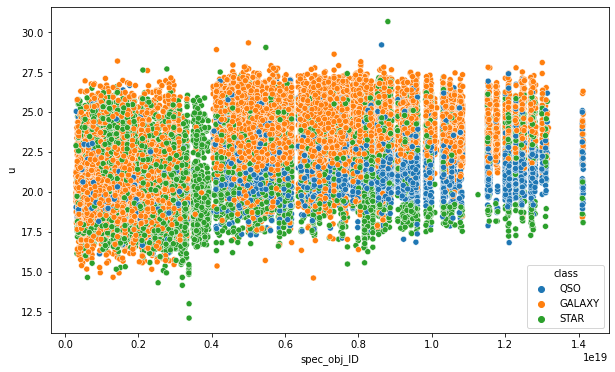

In [34]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'spec_obj_ID', y = 'u', data = train_df, hue = 'class')
plt.show()

Na wykresie widać obszary zdominowane przez badane klasy gwiazdozbiorów.

#### 3.7.3. zależność spec_obj_ID od delta i klasy
spec_obj_ID = Unikalny identyfikator używany dla obiektów spektroskopii optycznej (oznacza to, że 2 różne obserwacje z tym samym identyfikatorem spec_obj_ID muszą dzielić klasę wyjściową)  
delta = kąt deklinacji (w epoce J2000)


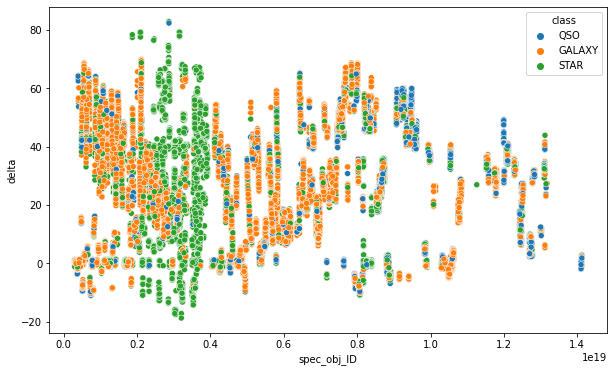

In [35]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'spec_obj_ID', y = 'delta', data = train_df, hue = 'class')
plt.show()

Może mieć znaczenie przy ustalaniu, czy analizowany obiekt jest klasy STAR.

### 4. Wnioski z EDA
- Klasa gwiazdy ma 3 możliwe wartości: STAR, GALAXY i QSO. Najpopularniejszą wartością jest więc GALAXY (59%), następnie QSO (22%) i STAR (19%). Dane nie są więc zbalansowane - w większości obserwacji klasą gwiazdy jest GALAXY.
- Kolumna spec_obj_ID ma bardzo duże znaczenie w zadaniu.
- Zmienne o nazwach [coś]_ID (z wyjątkiem sped_obj_ID) oraz cam_col nie mają znaczenia dla identyfikacji gwiazd.
- Zmienna redshift jest **bardzo istotna** przy określaniu klasy. Właściwie jednoznacznie określa klasę.
- Zmienna u może pomóc określić, czy badany obiekt jest klasy QSO czy GALAXY (QSO ma dużo wartości u~=21, podczas gdy GALAXY ma ich bardzo mało).

Objaśnienie nazw zmiennych:
- spec_obj_ID = Unikalny identyfikator używany dla obiektów spektroskopii optycznej (oznacza to, że 2 różne obserwacje z tym samym identyfikatorem spec_obj_ID muszą dzielić klasę wyjściową)
- u = Filtr ultrafioletowy w systemie fotometrycznym
- redshift = wartość przesunięcia ku czerwieni oparta na wzroście długości fali
